# **Ondas de gravedad**



El problema de ondas de gravedad se reduce a estudiar la función de amplitud del potencial de velocidad $\phi(x,z,t) = f(z)e^{i(kx-\omega t)}$, dado que debe cumplir la ecuación de Laplace ($\nabla^2\phi=0$), entonces $f(z)=Ae^{kz}+Be^{-kz}$, con $A$ y $B$ constantes que se definen por condiciones iniciales. Es importante tener en cuenta que lo que se busca analizar es la relación de dispersión de las ondas, es decir $\omega=\omega(k)$, por esto, conocer las constantes $A$ y $B$ no será nuestro objetivo.

Lo siguiente que es necesario tener en cuenta son las condiciones de contorno y continuidad en interfases de fluidos. Las condiciones de contorno, en caso de tener una pared rígida, consiste en tener velocidad normal nula ahí. Esto, en término del potencial velocidad, se traduce en

$$\frac{\partial \phi}{\partial z}\Big|_{z=z_{cont}}=0.$$

Luego están las dos ecuaciones que se derivan de la continuidad de velocidad y presión entre dos fluidos, que resultan

$$\Bigg(\frac{\partial \phi_j}{\partial z}=\frac{\partial \phi_{j+1}}{\partial z}\Bigg)\Bigg|_{z=z_{interfaz}},   \quad   \Bigg(\rho_jg\frac{\partial \phi_j}{\partial z}+\rho_j\frac{\partial^2 \phi_j}{\partial t^2} = \rho_{j+1}g\frac{\partial \phi_{j+1}}{\partial z}+\rho_{j+1}\frac{\partial^2 \phi_{j+1}}{\partial t^2}\Bigg)\Bigg|_{z=z_{interfaz}}$$

 donde los índices diferencian las $\phi$ de cada fluido y $\rho_i$ es la densidad del fluido *i-ésimo*. Notar que si uno de los fluidos es aire, este se puede despreciar y entonces $\rho_{aire}≃0$ y $\frac{\partial \phi_{aire}}{\partial z}≃0$.


## **Adimensionalización**

Para la solución particular que estamos considerando $\phi_j(x,z,t) = \left(A_j e^{kz} + B_je^{-kz}\right)e^{kx-\omega t}$, las ecuaciones de continuidad de velocidad y presión resultan (sobre la $j$-esima interfaz $z=z_j$)

\begin{align*}
k\left(A_je^{kz_j} - B_je^{-kz_j}\right)&=k\left(A_{j+1}e^{kz_j} - B_{j+1}e^{-kz_j}\right) \\
\rho_j\left[kg\left(A_je^{kz_j} - B_je^{-kz_j}\right) - \omega^2 \left(A_je^{kz_j} + B_je^{-kz_j}\right)\right] &= \rho_{j+1}\left[kg\left(A_{j+1}e^{kz_j} - B_{j+1}e^{-kz_j}\right) - \omega^2 \left(A_{j+1}e^{kz_j} + B_{j+1}e^{-kz_j}\right)\right]
\end{align*}

A pesar de que los coeficientes $A_j$ y $B_j$ tienen unidades, dado que no nos interesa obtenerlos no vamos a ganar nada adimensionalizandolos.
Sin embargo, podemos adimensionalizar la frecuencia $\omega$ y simplificar un poco. Para esto, dividimos por $k$ la primer ecuación y por $kg$ la segunda

\begin{align*}
A_je^{kz_j} - B_je^{-kz_j} &= A_{j+1}e^{kz_j} - B_{j+1}e^{-kz_j} \\
\rho_j\left[\left(A_je^{kz_j} - B_je^{-kz_j}\right) - \frac{\omega^2}{kg} \left(A_je^{kz_j} + B_je^{-kz_j}\right)\right] &= \rho_{j+1}\left[\left(A_{j+1}e^{kz_j} - B_{j+1}e^{-kz_j}\right) - \frac{\omega^2}{kg} \left(A_{j+1}e^{kz_j} + B_{j+1}e^{-kz_j}\right)\right]
\end{align*}

Para que los coeficientes que acompañan los $A_j$ y $B_j$ en estas ecuaciones sean adimensionales, podemos tomar alguna densidad característica $\rho_0$ (normalmente, la más grande de todas las $\rho_j$) y así tener $\rho'_j = \rho_j/\rho_0$.

## **Problema 10**

Para resolver numéricamente este problema lo llevaremos a un problema matricial que luego configure un problema de autovalores y autovectores. Para esto consideremos un vector de amplitudes de los *n* potenciales de velocidad $\phi_i$, que resulta

$$\vec{v}= (A_1, B_1, A_2, B_2, ...., A_n,B_n)^T.$$

Luego construiremos una matriz $\boldsymbol{C}$ que contenga en sus filas las ecuaciones de contorno y continuidad para todos los fluidos, de forma tal que $\boldsymbol{C}\cdot\vec{v}=0$. Esto se traduce en, por ejemplo, si tengo un contorno para el fluido que corresponde a $\phi_1$ en $z=z_1$, la ecuación resulta $kA_1e^{kz_1}-kB_1e^{-kz_1}=0$, lo que se traduce vectorialmente como

$$  (e^{kz_1}, -e^{-kz_1}, 0, 0, ...., 0, 0)\cdot\vec{v}=0 . $$

Esta podría ser la primer fila de la matriz $\boldsymbol{C}$.
Se puede notar que todas filas tendrán muchos coeficientes nulos, lo cual permitiría algoritmizar el armado de la matriz, teniendo especial cuidado con el sub-índice que le corresponde a cada componente.

Esta matriz se puede pensar como la suma de otras dos ($\boldsymbol{C}=\boldsymbol{M}-\frac{\omega^2}{kg} \boldsymbol{L}$), la matriz $\boldsymbol{M}$ que solo contiene dependencias de $k$, y la matriz $\boldsymbol{L}$ que es solo proporcional a $-\omega^2/kg$. De esta manera resulta entonces

$$(\boldsymbol{M}-\omega^2\boldsymbol{L})\vec{v}=\vec{0} \Leftrightarrow \boldsymbol{M}^{-1} \boldsymbol{L} \vec{v}=\frac{kg}{\omega^2}\vec{v}.$$

Ya tenemos creado el problema de autovaloers y autovectores, con autovalores $\lambda = \frac{kg}{\omega^2}$, ahora queda resolverlo numéricamente para el problema de dos y tres fluidos. Para esto es necesario escribir primero las matrices analíticamente y así poder construirlas.

Luego hay que hacerlo para distintos valores de $k$, para así obtener $\omega^2=\omega^2(k)$.

**Observaciones importantes:**

**-** Note que para cualquier cantidad de $n$ fluidos hay $n-1$ interfases. Esto implica que habrá $2(n-1)$ ecuaciones de continuidad, además de las $2$ condiciones de contorno, lo que resulta en una matriz $\boldsymbol{C}$ de dimensión $2n\times2n$.

**-**  Si se toma $k=0$ la matriz $\boldsymbol{M}$ resulta no inversible, para evitar esto puede tomar valores pequeños como iniciador del array de $k$.

**-**  Como el problema tendrá dimensión $2n$, habrá $2n$ cantidad de autvectores y autovalores. Pero solo se pueden esperar $n-1$ ramas para $\omega$, es decir que hay que elegir cuáles autovalores resultan físicamente relevantes. Pensemos entonces, que como la matriz $\boldsymbol{L}$ es no inversible (tiene muchos coeficientes nulos), es esperable que aparezcan muchas ramas con autovalores nulos de $kg/\omega^2$. Para evitar esto, es importante ordenar de mayor a menor y luego quedarse con las $n-1$ ramas de menores autovalores (lo que significan los mayores $\omega^2$, a modo de esquivar los nulos).

*Ayuda: Pueden ser útiles las siguientes funciones de la librería numpy de python:* `matmul`, `linalg.inv`, `linalg.eig`


# i)

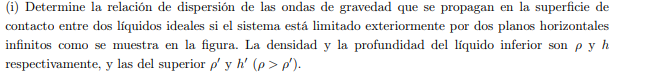

El ejercicio nos propone un sistema compuesto por dos fluidos encerrados entre dos placas a alturas h´ y -h. \\
Para empezar plantearemos una solución de la siguiente forma:

$$ ϕ = (A e^{kz} + B e^{-kz}) \cdot cos(kx- ωt)$$

Nótese que la amplitud está ligada a Z (debido a simetría de mi sistema) y que la onda viaja en X. Para facilitar la notación se referirá al primer paréntesis como f(z).

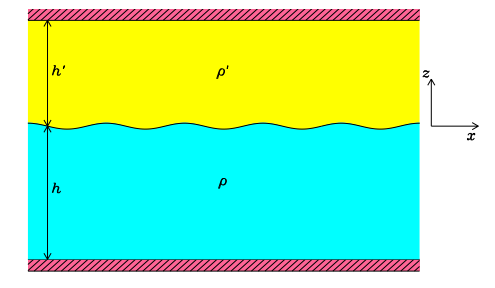

Para este sistema en específico se utilizarán las siguientes soluciones:

$$ ϕ = (A e^{kz} + B e^{-kz}) \cdot cos(kx- ωt), -h < z < 0$$
$$ ϕ´ = (A´ e^{kz} + B´ e^{-kz}) \cdot cos(kx- ωt), h´ > z > 0$$

Con el objetivo de definir y resolver nuestro sistema plantearemos condiciones de contorno tanto de continuidad como de presión. \\
Para continuidad en las placas (fuerzas continuas):

$$ \frac{∂ϕ}{∂z}\Big|_{z=-h} = 0, \ \ \ \ \ (1)$$

$$ \frac{∂ϕ´}{∂z}\Big|_{z=h´} = 0, \ \ \ \ \ (2)$$

Por otro lado entre la interfaz de los fluidos vamos a tomar:

$$ \frac{∂ϕ}{∂z}\Big|_{z= ɛ} =  \frac{∂ϕ´}{∂z}\Big|_{z= ɛ} , \ \ \ \ \ (3)$$

$$ ρ g \frac{∂ϕ}{∂z}\Big|_{z= ɛ} + ρ \frac{∂^2ϕ}{∂t^2}\Big|_{z= ɛ} = ρ´ g \frac{∂ϕ´}{∂z}\Big|_{z= ɛ} + ρ´ \frac{∂^2ϕ´}{∂t^2}\Big|_{z= ɛ}, \ \ \ \ \ (4)$$

Una vez planteado nos sistema de ecuaciones procedemos a resolver para calcular la relación de disperción. Primero resolvemos (1) y (2). Las cuales nos van a dar una relación entre los A y B, y A´ y B´. Es decir, relaciona los coeficientes de f(z) y f´(z). LLegamos a:

$$ A´ e^{kh´} - B´ e^{-kh´} = 0 $$

$$ A e^{-kh} - B e^{kh} = 0 $$

Lo cual al reemplazar en las respectivas soluciones obtenemos:

$$ ϕ = A (e^{kz} + e^{-2kh} e^{-kz}) \cdot cos(kx- ωt) $$
$$ ϕ´ = B´ ( e^{-2kh´} e^{kz} +  e^{-kz}) \cdot cos(kx- ωt) $$

Reescribienod estas últimas dos expresiones:

$$ ϕ = A \cdot coth(k(z+h)) \cdot cos(kx- ωt) $$
$$ ϕ´ = B´ \cdot coth(k(z-h´)) \cdot cos(kx- ωt) $$

En este momento nos disponemos a resolver (3) y (4). Nótese que estamos evaluando en z = ɛ y no z = 0 debido a que estamos en un régimen de mínimas perturbaciones. \\
Para las próximas cuentas usaré:

$$ ϕ_z = A \cdot k \cdot senh(k(z+h)) \cdot cos(kx - ωt)$$
$$ ϕ´_z = B´ \cdot k \cdot senh(k(z-h´)) \cdot cos(kx - ωt)$$
$$ ϕ_{tt} = -A ⋅ ω^2 \cdot coth(k(z+h)) \cdot cos(kx - ωt)$$
$$ ϕ´_{tt} = -B´ ⋅ ω^2 \cdot coth(k(z-h´)) \cdot cos(kx - ωt)$$

Empiezo resolviendo (3) usando las nuevas expresiones mis soluciones (con f(z) α coth()). Por lo tanto voy a obtener una relación de los coeficientes de f(z) y f´(z). Esta relación será:

$$ A = - B´ \cdot \frac{senh(kh´)}{senh(kh)}$$

Ahora ya teniendo más información de mi sistema utilizo (4), de la cual podre calcular mi relación de dispersión:

$$ ω^2 = \frac{k \cdot g \cdot (\rho - \rho´)}{\rho´ \cdot coth(kh´) + \rho \cdot coth(kh)}$$

# ii)

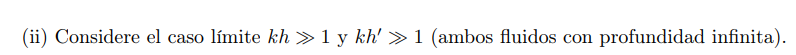

En el caso de profundidad infinita debemos tomar los límites $kh >> 1$ y $kh´>>1$. Esto nos afecta a nuestra relación de dispersión debido a su dependencia con $kh´$ y $kh$:

$$ coth(x) = \frac{e^x + e^{-x}}{e^x - e^{-x}} $$

Si tomamos límite $x → ∞$, obtendremos $ coth(x) ≈ 1 $, lo cual lo metemos en la relación de dispersión conocida:

$$ ω^2 = \frac{k \cdot g \cdot (\rho - \rho´)}{\rho´ + \rho}$$

Sabiendo que en ondas viajeras $v_{grupo} = \frac{ω}{k}$, podemos obtener la velocidad de grupo de nuestro sistema en esta aproximación:

$$ v_{grupo}^2 = \frac{ g \cdot (\rho - \rho´)}{k \cdot (\rho´ + \rho)}$$

Relación que además nos indica que las ondas son dispersivas.


# iii)

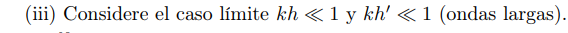

El caso de ondas largas, o de $λ >> 1$, nos propone $kh << 1$ y $ kh´<< 1$ debido a la relación inversa entre la longitud y el número de onda. Por lo tanto se puede hacer un análisis muy parecido al del anterior punto, tomando $x → 0$ en el coth(x) :

$$ coth(x) = \frac{e^x + e^{-x}}{e^x - e^{-x}} ≈ \frac{1}{x}$$

Nuevamente utilizando la definición de velocidad de mi onda y la relación de dispersión más general podemos llegar a lo siguiente:

$$  ω^2 = \frac{k^2 \cdot g \cdot (\rho - \rho´)}{\frac{\rho´}{h´} + \frac {\rho}{h}} $$

$$  v^2 = \frac{g \cdot (\rho - \rho´)}{(\frac{\rho´}{h´} + \frac {\rho}{h})} $$

Observando la relación de dispersión obtenida es posible decir que en este caso, al contrario que en aguas profundas, las ondas no son dispersivas.

# iv)

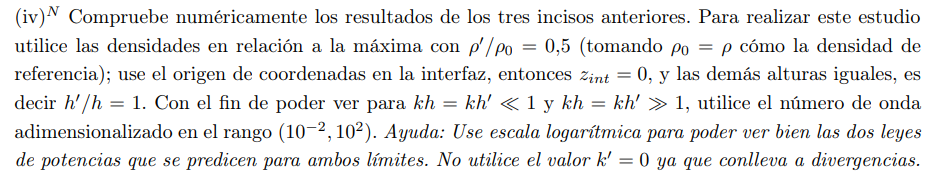

Gráfico de ω(k):

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def matriz_simple(k, l_1,l_2, z_int, rho_1, rho_2, g):
  global M
  global L
  M = np.zeros((4,4))
  L = np.zeros((4,4))
## Armo M ##

#fila de condición de placa inferior

  M[0][0] = np.exp(k * l_1)
  M[0][1] = (-1) * np.exp((-1) * k * l_1)
  M[0][2] = 0
  M[0][3] = 0

#fila de condición de continuidad interfaz

  M[1][0] = np.exp(k * z_int)
  M[1][1] = (-1) * np.exp((-1) * k * z_int)
  M[1][2] = (-1) * np.exp(k * z_int)
  M[1][3] = np.exp((-1) * k * z_int)

#fila de condición de continuidad de presión

  M[2][0] = rho_1 * np.exp(k * z_int)
  M[2][1] = (-1)* rho_1 * np.exp((-1) * k * z_int)
  M[2][2] = (-1) * rho_2 * np.exp(k * z_int)
  M[2][3] = rho_2 * np.exp((-1) * k * z_int)

#fila de condición de placa superior

  M[3][0] = 0
  M[3][1] = 0
  M[3][2] = np.exp((-1) * k * l_2)
  M[3][3] = (-1) * np.exp(k * l_2)


## Armo L ##

  L[2][0] = (-1) * rho_1 * np.exp(k * z_int)
  L[2][1] = (-1) * rho_1 * np.exp((-1) * k * z_int)
  L[2][2] = rho_2 * np.exp(k * z_int)
  L[2][3] = rho_2 * np.exp((-1) * k * z_int)

def rel_disp(rho_1, rho_2, k, l_1, l_2, g):
  w_cuadrado = (g * k * (rho_2 - rho_1)) / (rho_2 * (np.tanh(k * l_2))**(-1) + rho_1 * (np.tanh(k * l_1))**(-1))
  return w_cuadrado

def omega2(M, L, k):
    A = np.dot(np.linalg.inv(M), L) # DEFINIR LA MATRIZ A = M^(-1)L
    eigval, eigvect = np.linalg.eig(A) # CALCULAR AUTOVALORES Y AUTOVECTORES
    order = np.argsort(np.abs(eigval))         # ORDENO LOS AUTOVALORES
    w2 = k/np.real(eigval[order])              # CALCULO w^2 (FRECUENCIA AL CUADRADO)
    n_ramas = len(rho)-1                       # CANTIDAD DE RAMAS
    return w2[-n_ramas:]

In [5]:
## Parámetros ##

k = np.arange(1e-02, 1e02+1e-03, 1e-03)
w = []
w_teo = []
l_1 = 5
l_2 = 5
z_int = 0.1
rho_1 = 2
rho_2 = 1
g = 9.81

rho = [2, 1]

for i in range(len(k)):
  matriz_simple(k[i], l_1,l_2, z_int, rho_1, rho_2, g)
  A = np.dot(np.linalg.inv(M), L)
  autoval, autovec = np.linalg.eig(A)
  w_teo.append(rel_disp(rho_2, rho_1, k[i], l_1, l_2, g))
  w.append(omega2(M, L, k[i]) )

<ipython-input-1-9651e8dbbf86>:56: RuntimeWarning: divide by zero encountered in divide
  w2 = k/np.real(eigval[order])              # CALCULO w^2 (FRECUENCIA AL CUADRADO)
<ipython-input-1-9651e8dbbf86>:56: RuntimeWarning: overflow encountered in divide
  w2 = k/np.real(eigval[order])              # CALCULO w^2 (FRECUENCIA AL CUADRADO)


In [ ]:
#Comparo con las rel. de dispersión analítica

plt.figure(figsize=(25, 8))

plt.plot(k, w, c= "blue", label="Datos analíticos")
plt.plot(k, w_teo, c= "purple", label="Datos computacionales")
plt.axvspan(1.2, max(k), alpha=0.3, color='gray', label='Región kh>>1')
plt.axvspan(min(k), 0.8, alpha=0.7, color='gray', label='Región kh<<1')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\omega^2$', fontsize = 40)
plt.xlabel(r'k', fontsize = 40)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27)
plt.grid(linestyle='--')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')


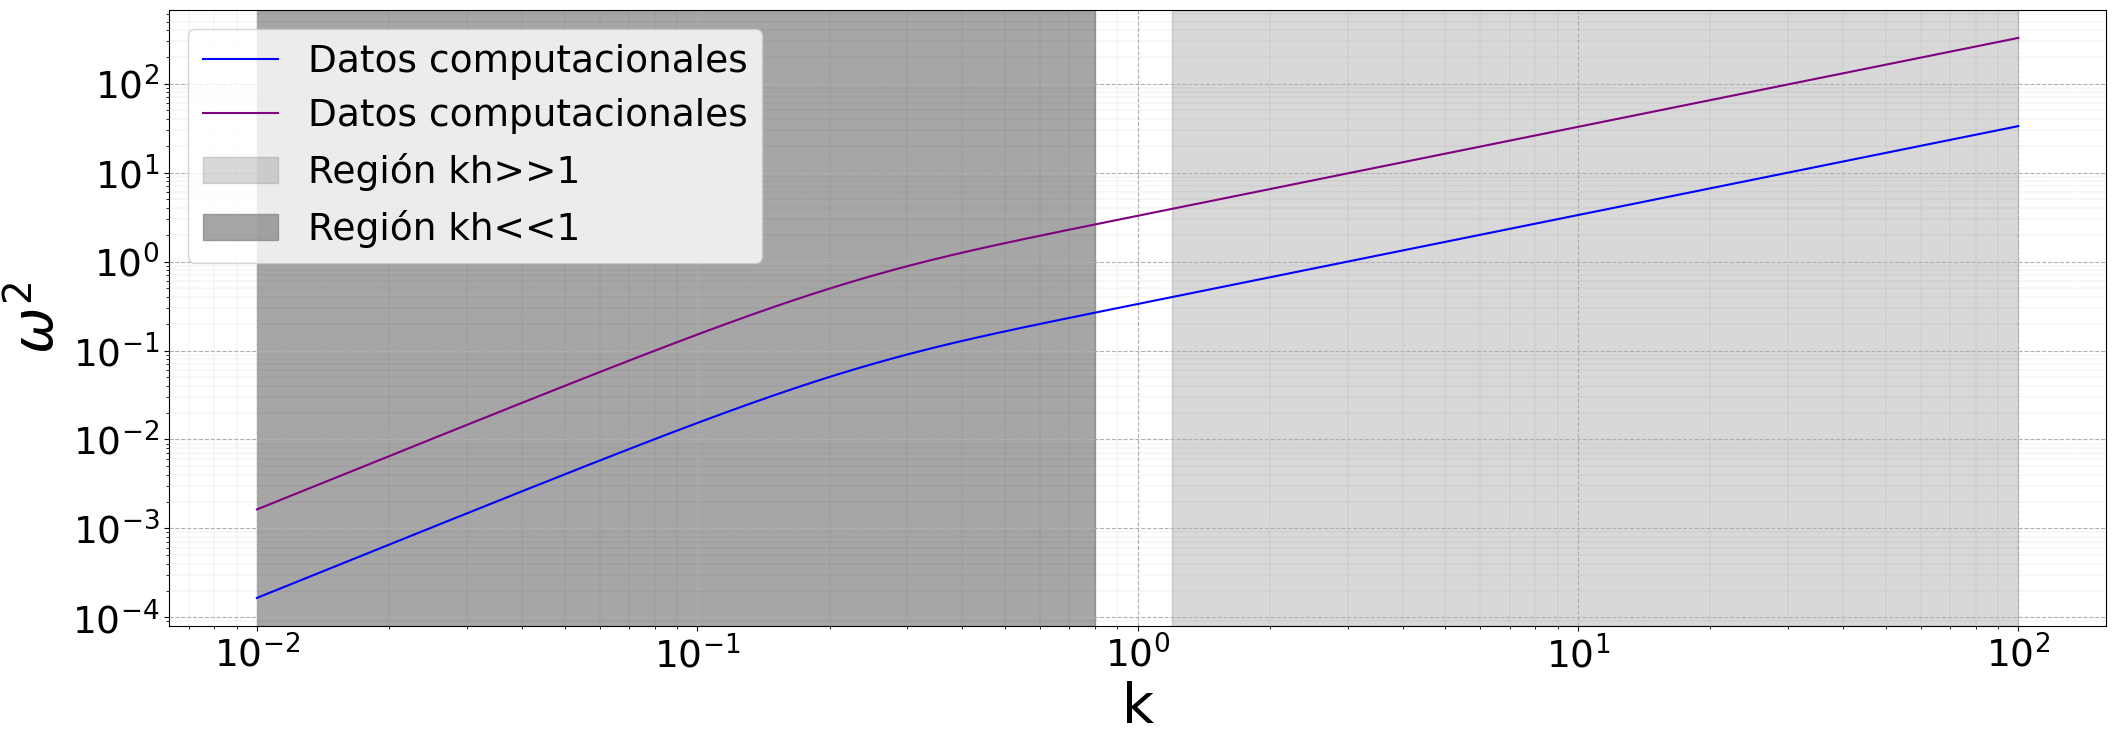

In [ ]:
#Comparo con las rel. de dispersión de aguas profundas y ondas largas

## Parámetros ##

k = np.arange(1e-02, 1e02+1e-03, 1e-03)
w = []
w_teo_ap = []
w_teo_ol = []
l_1 = 5
l_2 = 5
z_int = 0.1
rho_1 = 2
rho_2 = 1
g = 9.81

rho = [2, 1]

for i in range(len(k)):
  matriz_simple(k[i], l_1,l_2, z_int, rho_1, rho_2, g)
  A = np.dot(np.linalg.inv(M), L)
  autoval, autovec = np.linalg.eig(A)
  w_modelo_ap = ((k[i] * g * (rho_1 - rho_2))/(rho_1 + rho_2))
  w_modelo_ol = ((k[i]**2 * g * (rho_1 - rho_2))/(rho_1/l_1 + rho_2/l_1))
  w_teo_ap.append(w_modelo_ap)
  w_teo_ol.append(w_modelo_ol)
  w.append(omega2(M, L, k[i]))


plt.figure(figsize=(25, 8))

plt.plot(k, w, c= "blue", label="Datos computacionales")
plt.plot(k, w_teo_ap, "o--", c="orange", label="Datos de modelo teórico aguas profundas")
plt.plot(k, w_teo_ol, "o--", c="green", label="Datos de modelo teórico ondas largas")
plt.axvspan(1.2, max(k), alpha=0.3, color='gray', label='Región kh>>1')
plt.axvspan(min(k), 0.8, alpha=0.7, color='gray', label='Región kh<<1')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\omega^2$', fontsize = 40)
plt.xlabel(r'k', fontsize = 40)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27)
plt.grid(linestyle='--')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')


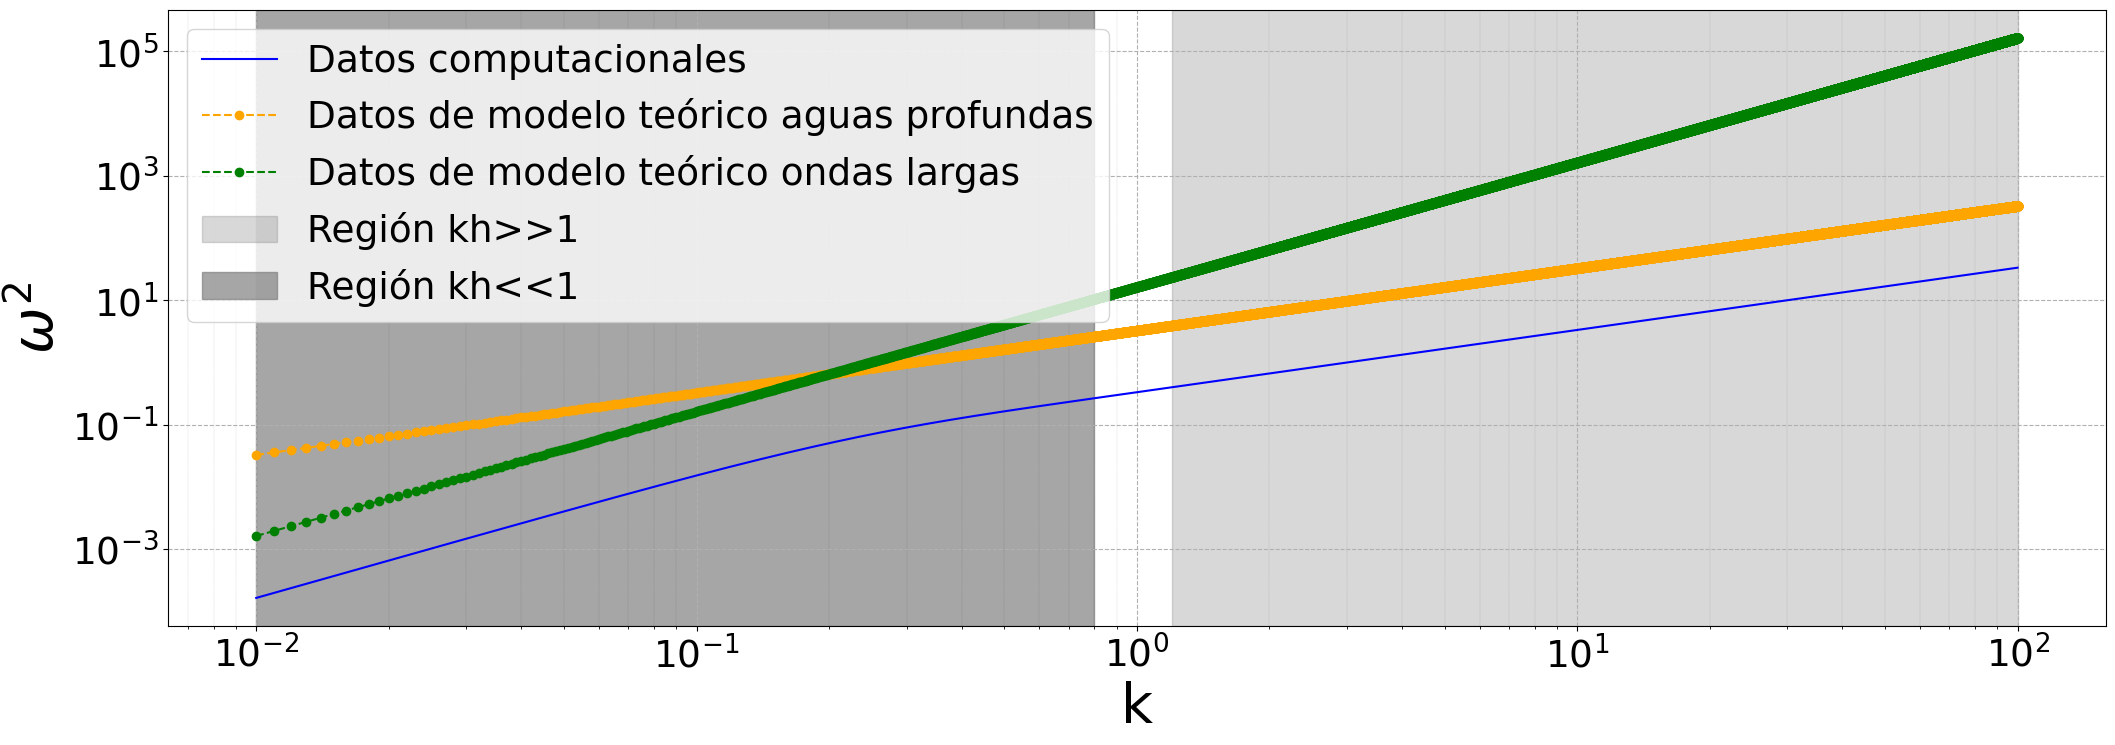

In [ ]:
# Vario mi longitud/profundida usando transparencia

## Parámetros ##

k = np.arange(1e-02, 1e02+1e-03, 1e-03)
#l = [5, 10]
l = np.arange(0,102, 2)
w = []
l_1 = 5
l_2 = 5
z_int = 0.1
rho_1 = 2
rho_2 = 1
g = 9.81

plt.figure(figsize=(25, 8))
s = len(l)

for j in range(len(l)):
  w = []
  for i in range(len(k)):
    #print(i)
    matriz_simple(k[i], l[j],l[j], z_int, rho_1, rho_2, g)
    A = np.dot(np.linalg.inv(M), L)
    autoval, autovec = np.linalg.eig(A)
    w.append(omega2(M, L, k[i]))
  plt.plot(k, w, color = "blue" , alpha = j/s)

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\omega^2$', fontsize = 40)
plt.xlabel(r'k', fontsize = 40)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27)
plt.grid(linestyle='--')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show()

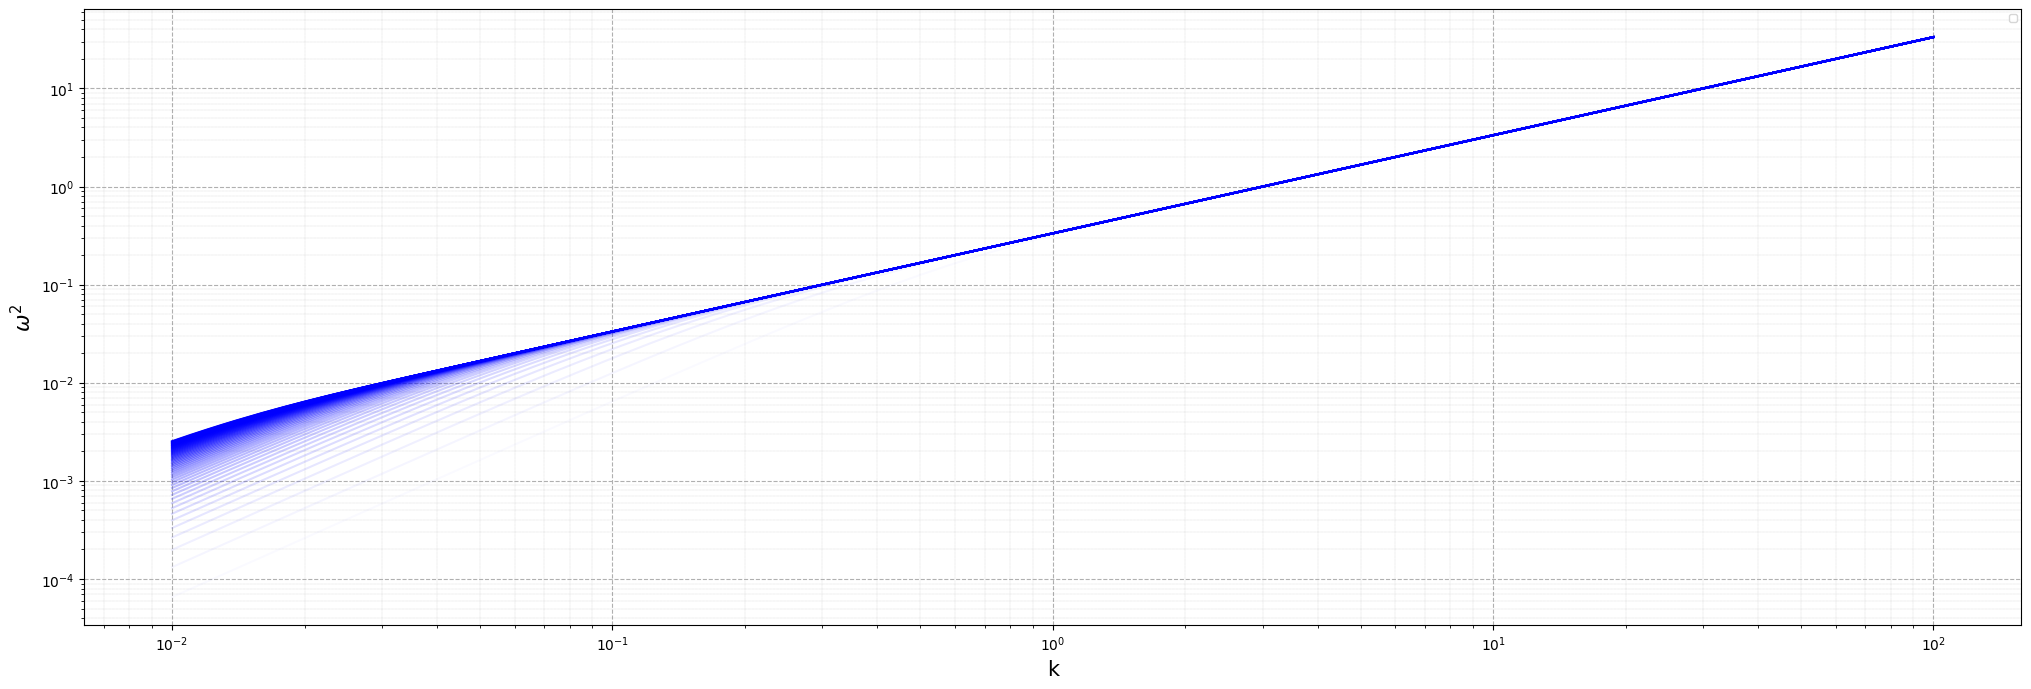

In [ ]:
# Vario mi longitud/profundida usando un gráfico 3D

## Parámetros ##
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

k = np.arange(1e-02, 1e02+1e-03, 1e-03)
#l = np.arange(0,102, 10)
l = [5, 15]
w = []
l_1 = 5
l_2 = 5
z_int = 0.1
rho_1 = 2
rho_2 = 1
g = 9.81

rho = [2, 1]

plt.figure(figsize=(25, 8))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for j in range(len(l)):
  w = []
  for i in range(len(k)):
    #print(i)
    matriz_simple(k[i], l[j],l[j], z_int, rho_1, rho_2, g)
    A = np.dot(np.linalg.inv(M), L)
    autoval, autovec = np.linalg.eig(A)
    w.append(omega2(M, L, k[i]))
    ax.scatter(k[i], w[-1], l[j])

# Etiquetas de los ejes
plt.yscale('log')
plt.xscale('log')
plt.Zscale('log')
ax.set_xlabel('k')
ax.set_ylabel(r'$\omega^2$')
ax.set_zlabel('Longitud')

# Muestra el gráfico
plt.show()

<ipython-input-3-9651e8dbbf86>:56: RuntimeWarning: divide by zero encountered in divide
  w2 = k/np.real(eigval[order])              # CALCULO w^2 (FRECUENCIA AL CUADRADO)


# v)

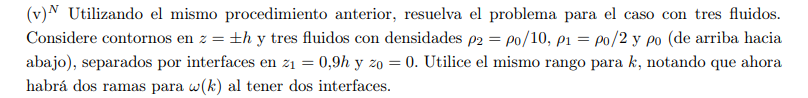

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def matriz_3(k, l_1,l_2, z_int, z_int_2, rho_1, rho_2, rho_3, g):
  global M
  global L
  M = np.zeros((6,6))
  L = np.zeros((6,6))
## Armo M ##

#fila de condición de placa inferior

  M[0][0] = np.exp(k * l_1)
  M[0][1] = (-1) * np.exp((-1) * k * l_1)

#fila de condición de continuidad interfaz

  M[1][0] = np.exp(k * z_int)
  M[1][1] = (-1) * np.exp((-1) * k * z_int)
  M[1][2] = (-1) * np.exp(k * z_int)
  M[1][3] = np.exp((-1) * k * z_int)

#fila de condición de continuidad de presión

  M[2][0] = rho_1 * np.exp(k * z_int)
  M[2][1] = (-1)* rho_1 * np.exp((-1) * k * z_int)
  M[2][2] = (-1) * rho_2 * np.exp(k * z_int)
  M[2][3] = rho_2 * np.exp((-1) * k * z_int)

  M[3][2] = np.exp(k * z_int_2)
  M[3][3] = (-1)* np.exp((-1) * k * z_int_2)
  M[3][4] = (-1) * np.exp(k * z_int_2)
  M[3][5] = np.exp((-1) * k * z_int_2)


  M[4][2] = rho_2 * np.exp(k * z_int_2)
  M[4][3] = (-1)* rho_2 * np.exp((-1) * k * z_int_2)
  M[4][4] = (-1) * rho_3 * np.exp(k * z_int_2)
  M[4][5] = rho_3 * np.exp((-1) * k * z_int_2)


  M[5][4] = np.exp((-1) * k * l_2)
  M[5][5] = (-1) * np.exp(k * l_2)


## Armo L ##

  L[2][0] = (-1) * rho_1 * np.exp(k * z_int)
  L[2][1] = (-1) * rho_1 * np.exp((-1) * k * z_int)
  L[2][2] = rho_2 * np.exp(k * z_int)
  L[2][3] = rho_2 * np.exp((-1) * k * z_int)

  L[4][2] = (-1) * rho_2 * np.exp(k * z_int_2)
  L[4][3] = (-1) * rho_2 * np.exp((-1) * k * z_int_2)
  L[4][4] = rho_3 * np.exp(k * z_int_2)
  L[4][5] = rho_3 * np.exp((-1) * k * z_int_2)


def omega2(M, L, k):
    A = np.dot(np.linalg.inv(M), L) # DEFINIR LA MATRIZ A = M^(-1)L
    eigval, eigvect = np.linalg.eig(A) # CALCULAR AUTOVALORES Y AUTOVECTORES
    order = np.argsort(np.abs(eigval))         # ORDENO LOS AUTOVALORES
    w2 = k/np.real(eigval[order])              # CALCULO w^2 (FRECUENCIA AL CUADRADO)
    n_ramas = len(rho)-1                       # CANTIDAD DE RAMAS
    return w2[-n_ramas:]

In [16]:
## Parámetros ##

k = np.arange(1e-02, 1e02+1e-03, 1e-03)
w_0 = []
w_1 = []
l_1 = 0.1
l_2 = -1.9
z_int = 0
z_int_2 = -0.9
rho_1 = 10
rho_2 = 5
rho_3 = 1
g = 9.81

rho = [10, 2, 1]

for i in range(len(k)):
  #print(i)
  matriz_3(k[i], l_1,l_2, z_int, z_int_2, rho_1, rho_2, rho_3, g)
  A = np.dot(np.linalg.inv(M), L)
  autoval, autovec = np.linalg.eig(A)
  w_0.append(omega2(M, L, k[i])[0])
  w_1.append(omega2(M, L, k[i])[1])

<ipython-input-15-89ff70f3c842>:64: RuntimeWarning: divide by zero encountered in divide
  w2 = k/np.real(eigval[order])              # CALCULO w^2 (FRECUENCIA AL CUADRADO)


In [ ]:

plt.figure(figsize=(25, 8))

plt.plot(k, w_0, c= "blue", label="Datos computacionales primer interfaz")
plt.plot(k, w_1, c= "red", label="Datos computacionales segunda interfaz")
plt.axvspan(1.2, max(k), alpha=0.3, color='gray', label='Región kh>>1')
plt.axvspan(min(k), 0.8, alpha=0.7, color='gray', label='Región kh<<1')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\omega^2$', fontsize = 40)
plt.xlabel(r'k', fontsize = 40)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.legend(fontsize=27)
plt.grid(linestyle='--')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')

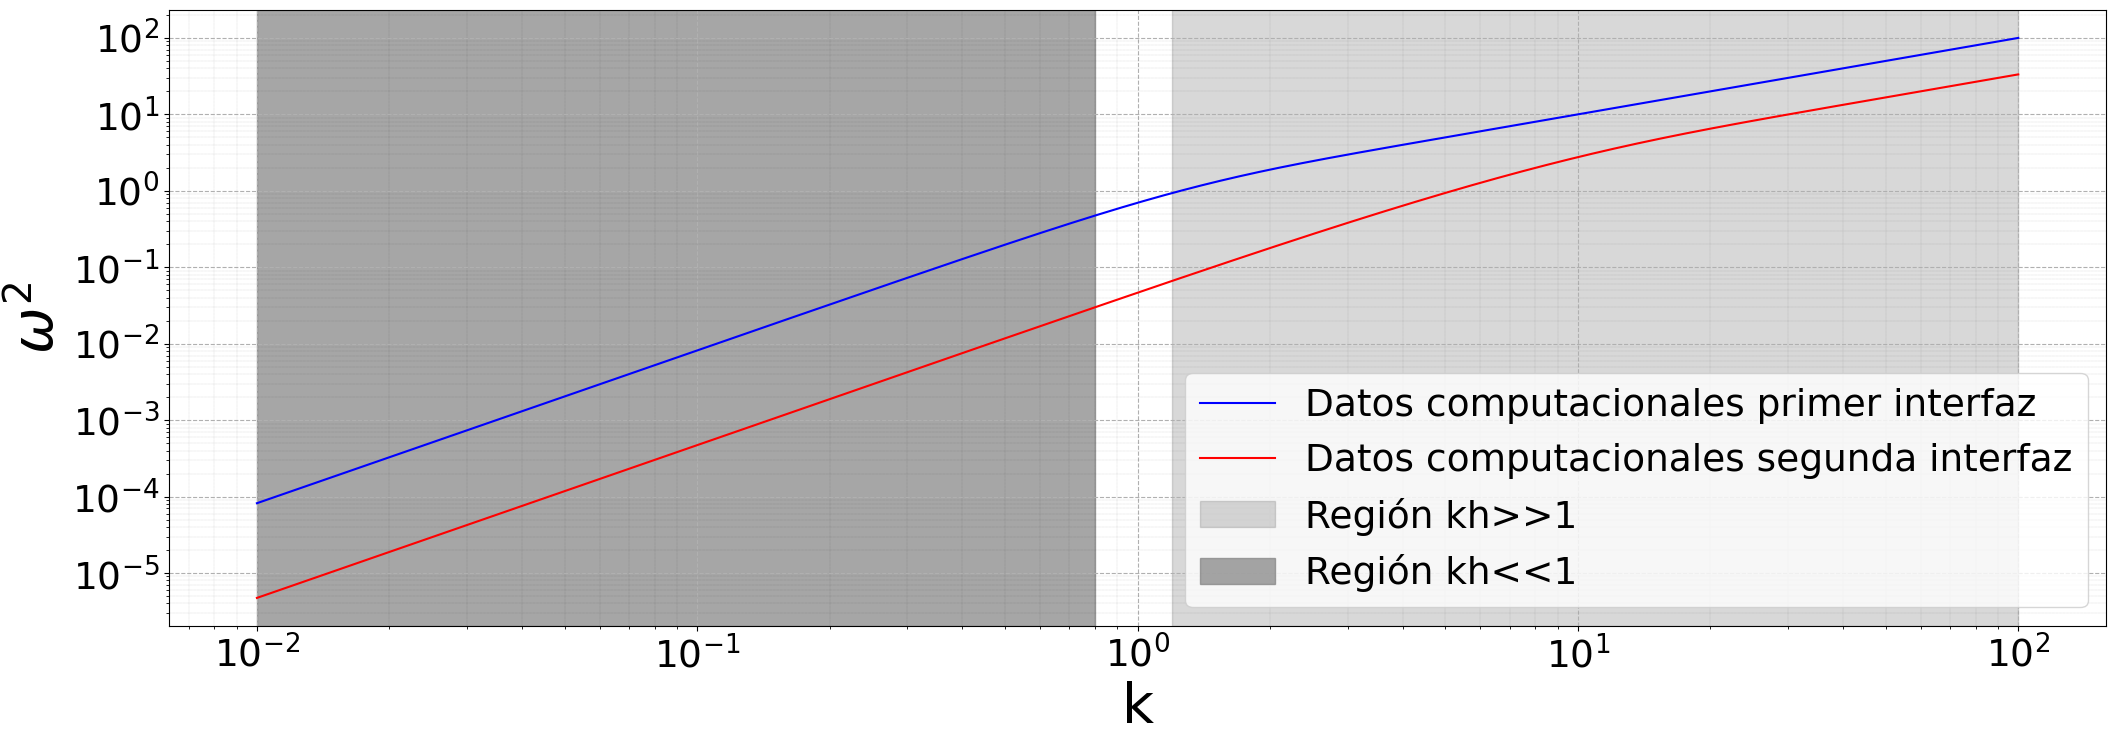